# Gene activity

This notebook generates gene activities for mono- and co-cultures at T0 and T24.

# 0. load data

# 0.1. import general Python modules

In [1]:
import pandas, os, numpy, seaborn
import matplotlib, matplotlib.pyplot

## 0.2. import MINER

In [2]:
# retrieve code from GitHub
if os.path.exists('miner_py3.py') == True:
    print('miner_py3.py already exists')
else:
    !wget https://raw.githubusercontent.com/MattWallScientist/miner3/master/miner/src/miner_py3.py

miner_py3.py already exists


In [3]:
import miner_py3 as miner

## 0.3 Paths to files

In [4]:
mechanistic_inference_results = '/Users/alomana/backups/cdi/miner_results_merged/mechanistic_inference_results/'
bicluster_membership_results = '/Users/alomana/backups/cdi/miner_results_merged/bicluster_membership_results/'

## 0.4. load MINER network

In [5]:
regulonDf = pandas.read_csv(os.path.join(mechanistic_inference_results, "regulonDf.csv"), index_col=0, header=0)

In [6]:
overExpressedMembersMatrix = pandas.read_csv(os.path.join(bicluster_membership_results,"overExpressedMembers.csv"), index_col=0, header=0)
overExpressedMembersMatrix.index = numpy.array(overExpressedMembersMatrix.index).astype(str)

underExpressedMembersMatrix = pandas.read_csv(os.path.join(bicluster_membership_results,"underExpressedMembers.csv"), index_col=0, header=0)
underExpressedMembersMatrix.index = numpy.array(underExpressedMembersMatrix.index).astype(str)

diff_matrix = overExpressedMembersMatrix-underExpressedMembersMatrix

# 1. infer regulon-based gene activity

In [7]:
network_activity_diff = miner.networkActivity(regulon_matrix=regulonDf.copy(), reference_matrix=diff_matrix.copy(), minRegulons=2)

# 2. computer gene activity for specific genes

In [8]:
samples_of_interest = [element for element in network_activity_diff.columns if 'cdi' in element]
print(samples_of_interest)
patients_by_subtype = [samples_of_interest[:12], samples_of_interest[12:]]
print(patients_by_subtype)

['cdi_01', 'cdi_02', 'cdi_03', 'cdi_04', 'cdi_05', 'cdi_06', 'cdi_07', 'cdi_08', 'cdi_09', 'cdi_10', 'cdi_11', 'cdi_12', 'cdi_13', 'cdi_14', 'cdi_15', 'cdi_16', 'cdi_17', 'cdi_18', 'cdi_19', 'cdi_20', 'cdi_21', 'cdi_22', 'cdi_23', 'cdi_24']
[['cdi_01', 'cdi_02', 'cdi_03', 'cdi_04', 'cdi_05', 'cdi_06', 'cdi_07', 'cdi_08', 'cdi_09', 'cdi_10', 'cdi_11', 'cdi_12'], ['cdi_13', 'cdi_14', 'cdi_15', 'cdi_16', 'cdi_17', 'cdi_18', 'cdi_19', 'cdi_20', 'cdi_21', 'cdi_22', 'cdi_23', 'cdi_24']]


## 0.4 genes of interest

In [9]:
network_activity = network_activity_diff.copy()

In [10]:
goi = {
    'CCND1' : 'ENSG00000110092',   # prognostic marker, upregulated in MM, PMID 20578819
    'CCND2' : 'ENSG00000118971',   # prognostic marker, upregulated in MM, PMID 20578819
    'CCND3' : 'ENSG00000112576',   # prognostic marker, upregulated in MM, PMID 20578819
    'Noxa'  : 'ENSG00000141682',   # know to upregulated NOXA, https://pubmed.ncbi.nlm.nih.gov/21247388/
    'BAK'   : 'ENSG00000030110',   # know to upregulated BAK, https://pubmed.ncbi.nlm.nih.gov/23762382/
    'PSMB5' : 'ENSG00000100804',   # BTZ binds to PSMB5
    'PSMB1' : 'ENSG00000008018',   # BTZ binds with low affinity to PSMB5
    'PSMB2' : 'ENSG00000126067'    # BTZ binds with low affinity to PSMB5
}

In [11]:
for element in goi:
    print(element)
    try:
        print('\t found with {} patients'.format(network_activity.loc[goi[element], :].size))
    except:
        print('\t not found')
        
            

CCND1
	 found with 932 patients
CCND2
	 found with 932 patients
CCND3
	 found with 932 patients
Noxa
	 found with 932 patients
BAK
	 not found
PSMB5
	 not found
PSMB1
	 found with 932 patients
PSMB2
	 found with 932 patients


In [12]:
goi = {
    'CCND1' : 'ENSG00000110092',   # prognostic marker, upregulated in MM, PMID 20578819
    'CCND2' : 'ENSG00000118971',   # prognostic marker, upregulated in MM, PMID 20578819
    'CCND3' : 'ENSG00000112576',   # prognostic marker, upregulated in MM, PMID 20578819
    'Noxa'  : 'ENSG00000141682',   # know to upregulated NOXA, https://pubmed.ncbi.nlm.nih.gov/21247388/
    #'BAK'   : 'ENSG00000030110',   # know to upregulated BAK, https://pubmed.ncbi.nlm.nih.gov/23762382/
    #'PSMB5' : 'ENSG00000100804',   # BTZ binds to PSMB5
    'PSMB1' : 'ENSG00000008018',   # BTZ binds with low affinity to PSMB5
    'PSMB2' : 'ENSG00000126067'    # BTZ binds with low affinity to PSMB5
}

In [13]:
# Generate dataframe 
info = {}
for target in goi:
    print(target)
    info[target] = numpy.array(network_activity.loc[goi[target],:])

df = pandas.DataFrame(info)
print(df.index)
print(network_activity.columns)
df.index = network_activity.columns

CCND1
CCND2
CCND3
Noxa
PSMB1
PSMB2
RangeIndex(start=0, stop=932, step=1)
Index(['MMRF_2297_1_BM', 'MMRF_2505_1_BM', 'MMRF_2353_1_BM', 'MMRF_2119_1_BM',
       'MMRF_1790_3_BM', 'MMRF_1758_1_BM', 'MMRF_2634_1_BM', 'MMRF_1992_2_BM',
       'MMRF_1300_1_BM', 'MMRF_2469_1_BM',
       ...
       'cdi_15', 'cdi_16', 'cdi_17', 'cdi_18', 'cdi_19', 'cdi_20', 'cdi_21',
       'cdi_22', 'cdi_23', 'cdi_24'],
      dtype='object', length=932)


In [14]:
# Generate boxplot data
labels = ["mono","co"]
boxplots = []
boxplots_labels = []
for gene in goi:
    print(gene)
    boxplot_data = [df.loc[subtype, gene] for subtype in patients_by_subtype]
    formatted_boxplot_data = miner.boxplot_figure(boxplot_data, labels)
    formatted_boxplot_data.rename(columns={'data': 'Gene activity', 'label': 'Condition'}, inplace=True)
    boxplots.append(formatted_boxplot_data)
    boxplots_labels.append(gene)

CCND1
CCND2
CCND3
Noxa
PSMB1
PSMB2


working with CCND1
working with CCND2
working with CCND3
working with Noxa
working with PSMB1
working with PSMB2


/Users/alomana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  # This is added back by InteractiveShellApp.init_path()


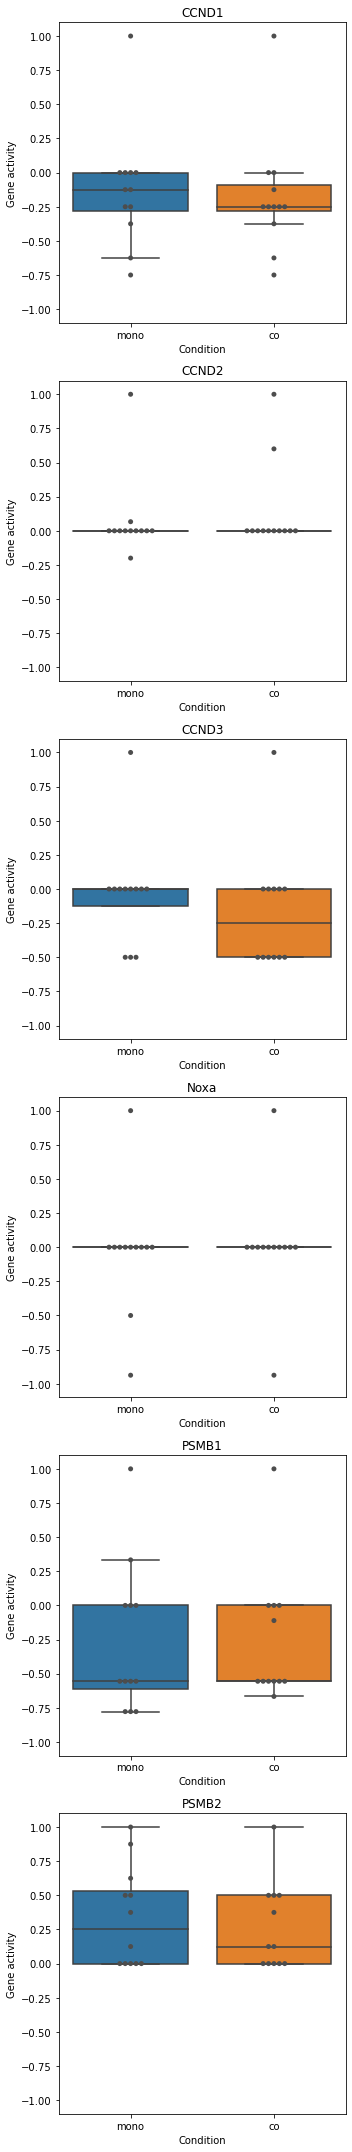

In [15]:
size_unit = 5
fig = matplotlib.pyplot.figure(figsize=(size_unit,size_unit*len(boxplots)), constrained_layout=True)
grid = fig.add_gridspec(len(boxplots), 1)

for i in range(len(boxplots)):
    print('working with {}'.format(boxplots_labels[i]))
    fig.add_subplot(grid[i,0])
    seaborn.boxplot(x="Condition", y="Gene activity", data=boxplots[i], fliersize=0).set_title(boxplots_labels[i])
    seaborn.swarmplot(x="Condition", y="Gene activity", data=boxplots[i], size=5, color=".3", linewidth=0)
    matplotlib.pyplot.ylim([-1.1, 1.1])
matplotlib.pyplot.tight_layout()